In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
os.makedirs("../data", exist_ok=True)

!wget -qO ../data/Churn.csv "https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv"

# Exploratory data analysis

In [3]:
# Importing data using pandas
telco = pd.read_csv('../data/Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
# Data type
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [5]:
# check any NA value
telco[telco.isna().any(axis=1)]

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone


no     2850
yes     483
Name: Churn, dtype: int64


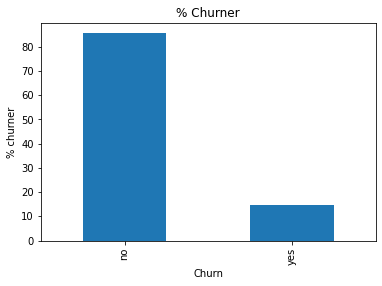

In [6]:
print(telco['Churn'].value_counts())
pd01 = telco['Churn'].value_counts(normalize=True)*100
pd01.plot.bar()
plt.title('% Churner')
plt.xlabel('Churn')
plt.ylabel('% churner')
plt.show()

In [7]:
# Group telco by 'Churn' and compute the mean
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [8]:
# Group telco by 'Churn' and compute the std
telco.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


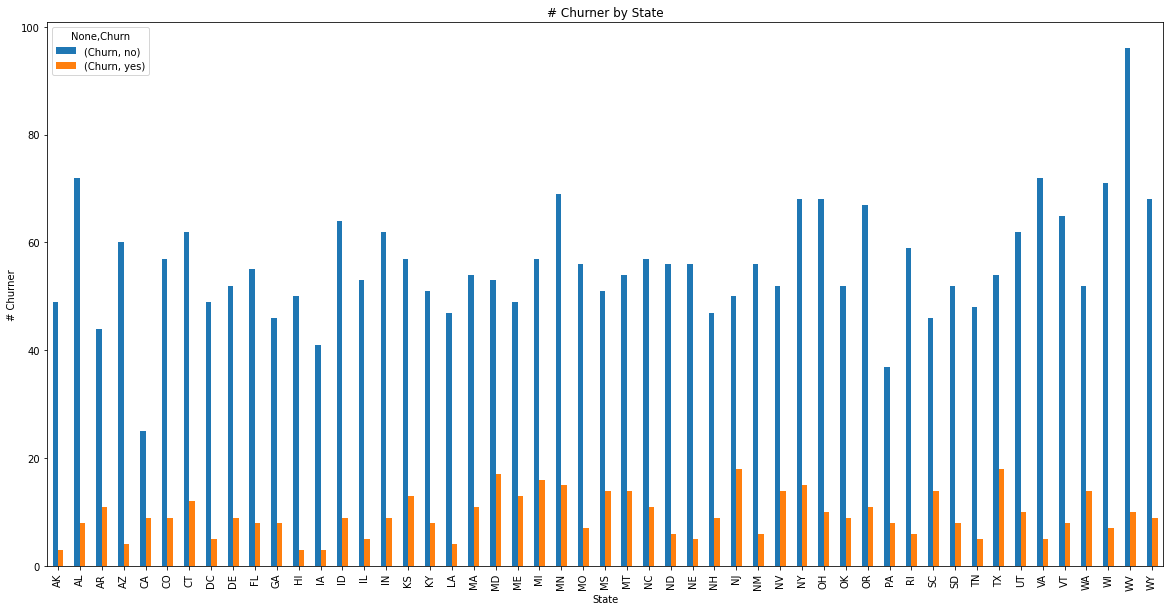

In [9]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())
pd01 = pd.DataFrame(telco.groupby('State')['Churn'].value_counts())\
    .unstack(level=1)
pd01.plot.bar(figsize=(20, 10))
plt.title('# Churner by State')
plt.xlabel('State')
plt.ylabel('# Churner')
plt.show()

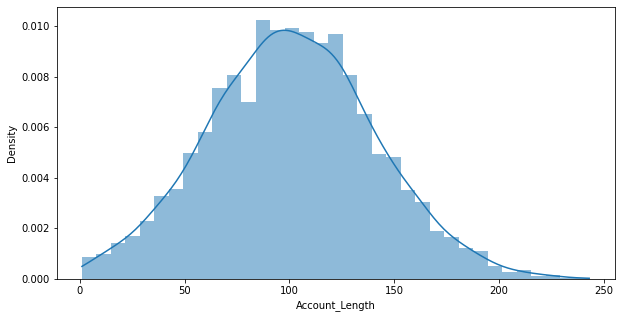

In [10]:
# Visualizing the distribution of account lengths
# Important to understand how variables are distributed
plt.figure(figsize=(10, 5))
sns.histplot(telco['Account_Length'], kde=True, stat='density',
    linewidth=0)
plt.show()

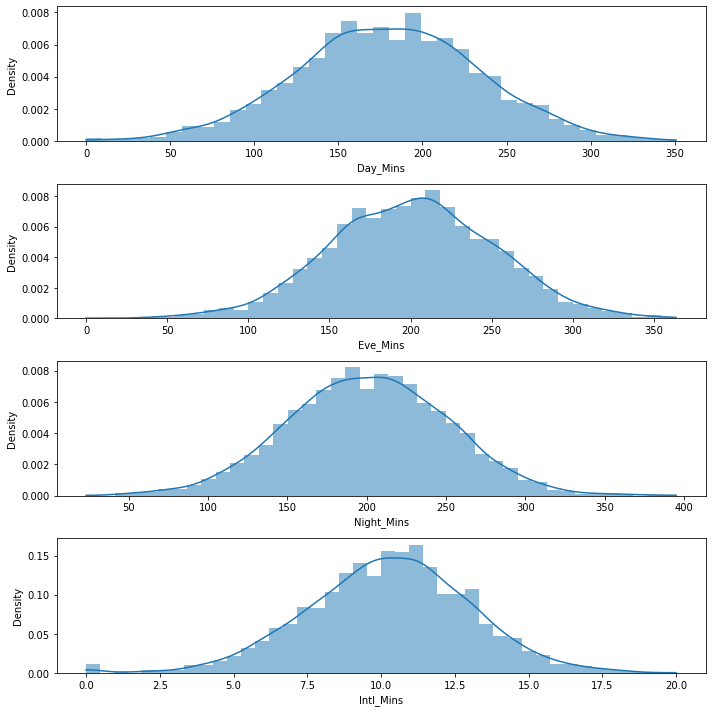

In [11]:
# Exploring distribution of variables
plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
sns.histplot(telco['Day_Mins'], kde=True, stat='density',
    linewidth=0)

plt.subplot(4, 1, 2)
sns.histplot(telco['Eve_Mins'], kde=True, stat='density',
    linewidth=0)

plt.subplot(4, 1, 3)
sns.histplot(telco['Night_Mins'], kde=True, stat='density',
    linewidth=0)

plt.subplot(4, 1, 4)
sns.histplot(telco['Intl_Mins'], kde=True, stat='density',
    linewidth=0)

plt.tight_layout()
plt.show()

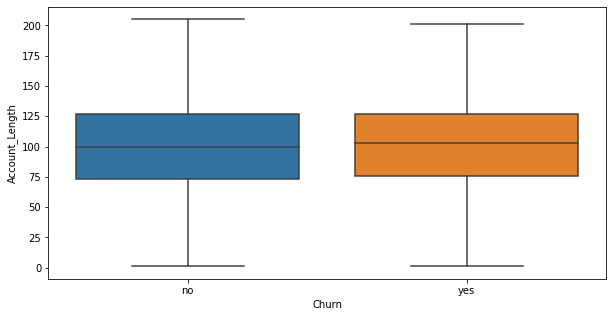

In [12]:
# Differences in account length
plt.figure(figsize=(10, 5))
sns.boxplot(data=telco, x='Churn', y='Account_Length', 
    sym="")
plt.show()

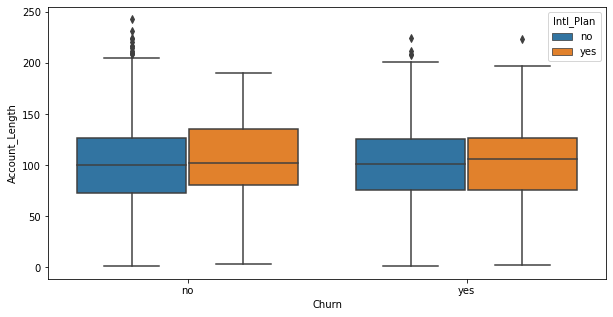

In [13]:
# Adding a third variable
plt.figure(figsize=(10, 5))
sns.boxplot(data=telco, x='Churn', y='Account_Length', 
    hue='Intl_Plan')
plt.show()

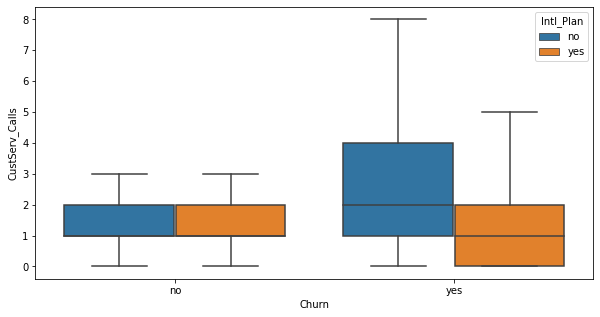

In [14]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=telco, x='Churn', y='CustServ_Calls',
    sym = "", hue="Intl_Plan")
plt.show()

# Feature engineering

In [15]:
# Dropping unnecessary features
telco = telco.drop(['Area_Code', 'Phone'], axis=1)
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')

In [16]:
# Compute correlated features
telco.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


In [17]:
# Dropping correlated features
telco = telco.drop(['Day_Charge', 'Eve_Charge', 
    'Night_Charge', 'Intl_Charge'], axis=1)
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'State'],
      dtype='object')

In [18]:
# Feature Engineering
# Create the new feature
telco['Avg_Day_Calls'] = np.where(telco['Day_Calls']==0, 0, telco['Day_Mins'] / telco['Day_Calls'])
telco['Avg_Eve_Calls'] = np.where(telco['Eve_Calls']==0, 0, telco['Eve_Mins'] / telco['Eve_Calls'])
telco['Avg_Night_Calls'] = np.where(telco['Night_Calls']==0, 0, telco['Night_Mins'] / telco['Night_Calls'])
telco['Avg_Intl_Calls'] = np.where(telco['Intl_Calls']==0, 0, telco['Intl_Mins'] / telco['Intl_Calls'])
# Print the summary statistic
telco[['Avg_Day_Calls', 'Avg_Eve_Calls', 'Avg_Night_Calls', 
    'Avg_Intl_Calls']].describe().round(2)

,Avg_Day_Calls,Avg_Eve_Calls,Avg_Night_Calls,Avg_Intl_Calls
count,3333.00,3333.00,3333.00,3333.00
mean,1.87,2.10,2.09,3.10
std,0.73,0.78,0.71,2.27
min,0.00,0.00,0.23,0.00
25%,1.38,1.62,1.61,1.67
50%,1.79,1.99,2.01,2.45
75%,2.26,2.49,2.46,3.80
max,7.22,15.61,7.12,18.20


In [19]:
# Encoding binary features
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])
telco['Vmail_Plan'] = LabelEncoder().fit_transform(telco['Vmail_Plan'])
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0, 'yes':1})

# Print the results to verify
telco[['Intl_Plan', 'Vmail_Plan', 'Churn']].describe().round(2)

,Intl_Plan,Vmail_Plan,Churn
count,3333.0,3333.00,3333.00
mean,0.1,0.28,0.14
std,0.3,0.45,0.35
min,0.0,0.00,0.00
25%,0.0,0.00,0.00
50%,0.0,0.00,0.00
75%,0.0,1.00,0.00
max,1.0,1.00,1.00


In [20]:
# Perform one hot encoding on 'State' 
tmp = pd.get_dummies(telco['State'], prefix='State')
telco = pd.concat([telco, tmp], axis=1)
telco.drop(['State'], axis=1, inplace=True)
# Print the summary statistic
telco.describe().round(2)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.0,3333.00,...,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,8.10,179.78,200.98,200.87,10.24,1.56,0.14,0.1,0.28,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02
std,39.82,13.69,54.47,50.71,50.57,2.79,1.32,0.35,0.3,0.45,...,0.13,0.13,0.15,0.15,0.15,0.15,0.14,0.15,0.18,0.15
min,1.00,0.00,0.00,0.00,23.20,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,74.00,0.00,143.70,166.60,167.00,8.50,1.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,101.00,0.00,179.40,201.40,201.20,10.30,1.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,127.00,20.00,216.40,235.30,235.30,12.10,2.00,0.00,0.0,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,243.00,51.00,350.80,363.70,395.00,20.00,9.00,1.00,1.0,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [21]:
# Scale telco using StandardScaler
telco[['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 
    'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 
    'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Avg_Day_Calls', 
    'Avg_Eve_Calls', 'Avg_Night_Calls', 'Avg_Intl_Calls']] = \
StandardScaler().fit_transform(telco[[
    'Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 
    'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 
    'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Avg_Day_Calls', 
    'Avg_Eve_Calls', 'Avg_Night_Calls', 'Avg_Intl_Calls']])
telco.reset_index(inplace=True, drop=True)
# Print summary statistics
telco.describe().round(2)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.0,3333.00,...,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.14,0.1,0.28,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.35,0.3,0.45,...,0.13,0.13,0.15,0.15,0.15,0.15,0.14,0.15,0.18,0.15
min,-2.51,-0.59,-3.30,-3.96,-3.51,-3.67,-1.19,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.68,-0.59,-0.66,-0.68,-0.67,-0.62,-0.43,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.00,-0.59,-0.01,0.01,0.01,0.02,-0.43,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.65,0.87,0.67,0.68,0.68,0.67,0.33,0.00,0.0,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3.56,3.13,3.14,3.21,3.84,3.50,5.65,1.00,1.0,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Churn prediction

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Create feature variable
X = telco.drop('Churn', axis=1)
# Create target variable
y = telco['Churn']
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(len(y_test))

(2666, 68)
667


In [27]:
# Import Support Vector Machine
from sklearn.svm import SVC
# Instantiate the classifier
svc = SVC()
# Fit the classifier
svc.fit(X_train, y_train)
# Predict the label of new_customer
prediction = svc.predict(X_test)
# Computing accuracy
svc.score(X_test, y_test)

0.8995502248875562

In [28]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate the classifier
clf = LogisticRegression()
# Fit the classifier
clf.fit(X_train, y_train)
# Computing accuracy
clf.score(X_test, y_test)

0.8620689655172413

In [29]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate the classifier
clf = DecisionTreeClassifier()
# Fit the classifier
clf.fit(X_train, y_train)
# Computing accuracy
clf.score(X_test, y_test)

0.9235382308845578

In [30]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the classifier
clf = RandomForestClassifier()
# Fit the classifier
clf.fit(X_train, y_train)
# Computing accuracy
clf.score(X_test, y_test)

0.9340329835082459